#### Decision Tree

#### Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image  
import pydotplus

#### Loading Data

In [ ]:
!wget https://cdn.extras.talentsprint.com/IOT/Data/iris.csv

--2022-03-27 10:36:54--  https://cdn.extras.talentsprint.com/IOT/Data/iris.csv
Resolving cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)... 172.105.52.210
Connecting to cdn.extras.talentsprint.com (cdn.extras.talentsprint.com)|172.105.52.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4610 (4.5K) [application/octet-stream]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2022-03-27 10:36:57 (266 MB/s) - ‘iris.csv’ saved [4610/4610]



In [ ]:
data=pd.read_csv('iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = data.iloc[:,:4].values
Y = data['Name'].values

In [ ]:
Y

#### Encoding the categorical label

In [ ]:
enc = LabelEncoder()
## for example encoding y
label_encoder = enc.fit(Y)
y = label_encoder.transform(Y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
enc.inverse_transform(y) # Again inversing the encoding

##### Displaying the classes and their equivalent encoded values

In [ ]:
print ("Categorical classes:", label_encoder.classes_)
integer_classes = label_encoder.transform(label_encoder.classes_)
print ("Integer classes:", integer_classes)

Categorical classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Integer classes: [0 1 2]


### Training a  Classifier

* Iterating the depth ranging from 1 to 4
* Performing decision tree classifier with each depth displaying the graph

#### Training and plotting the tree with Depth=1

In [ ]:
# Training and testing set ratio is 67 : 33
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

##### Training 

In [ ]:
clf = DecisionTreeClassifier(max_depth =1,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 [1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 1 1 0 0 1 1 1 1 1]
Accuracy score on test set :  0.68


In [ ]:
data.columns.values

array(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'],
      dtype=object)

##### Plotting the tree

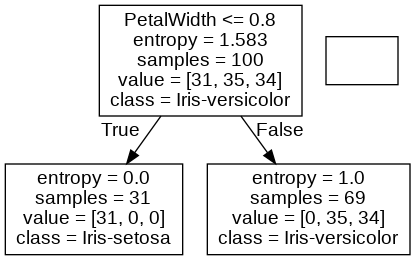

In [ ]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=2

##### Training

In [ ]:
clf = DecisionTreeClassifier(max_depth =2,criterion='entropy',min_samples_split=2)
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy score on test set :  0.98


##### Plotting the tree

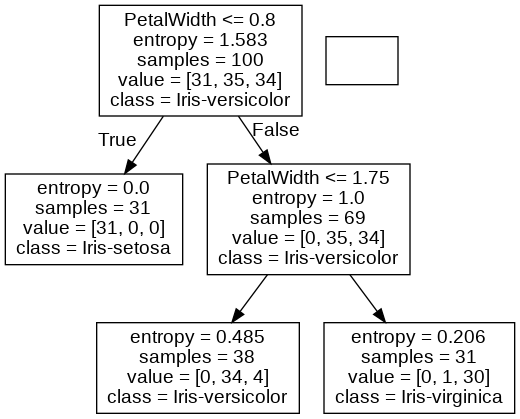

In [ ]:
ature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=3

##### Training

In [ ]:
clf = DecisionTreeClassifier(max_depth =3,criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy score on test set :  0.98


##### Plotting the tree

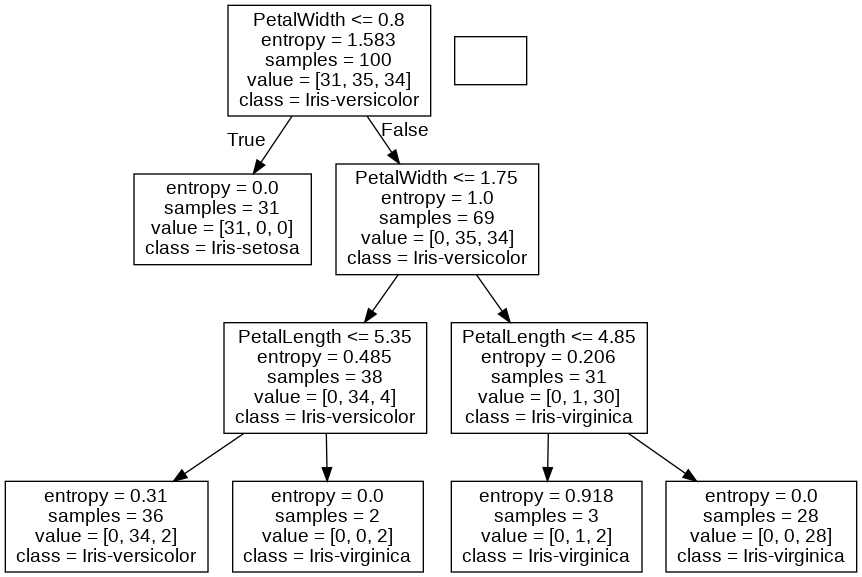

In [ ]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

#### Training and plotting the tree with Depth=5

##### Training

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
# Fitting the data
clf.fit(X_train,y_train)
# Predicting on test set
print("prediction of test set : \n",clf.predict(X_test))
# accuracy on test set
print("Accuracy score on test set : ",clf.score(X_test,y_test))

prediction of test set : 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy score on test set :  0.98


##### Plotting the tree

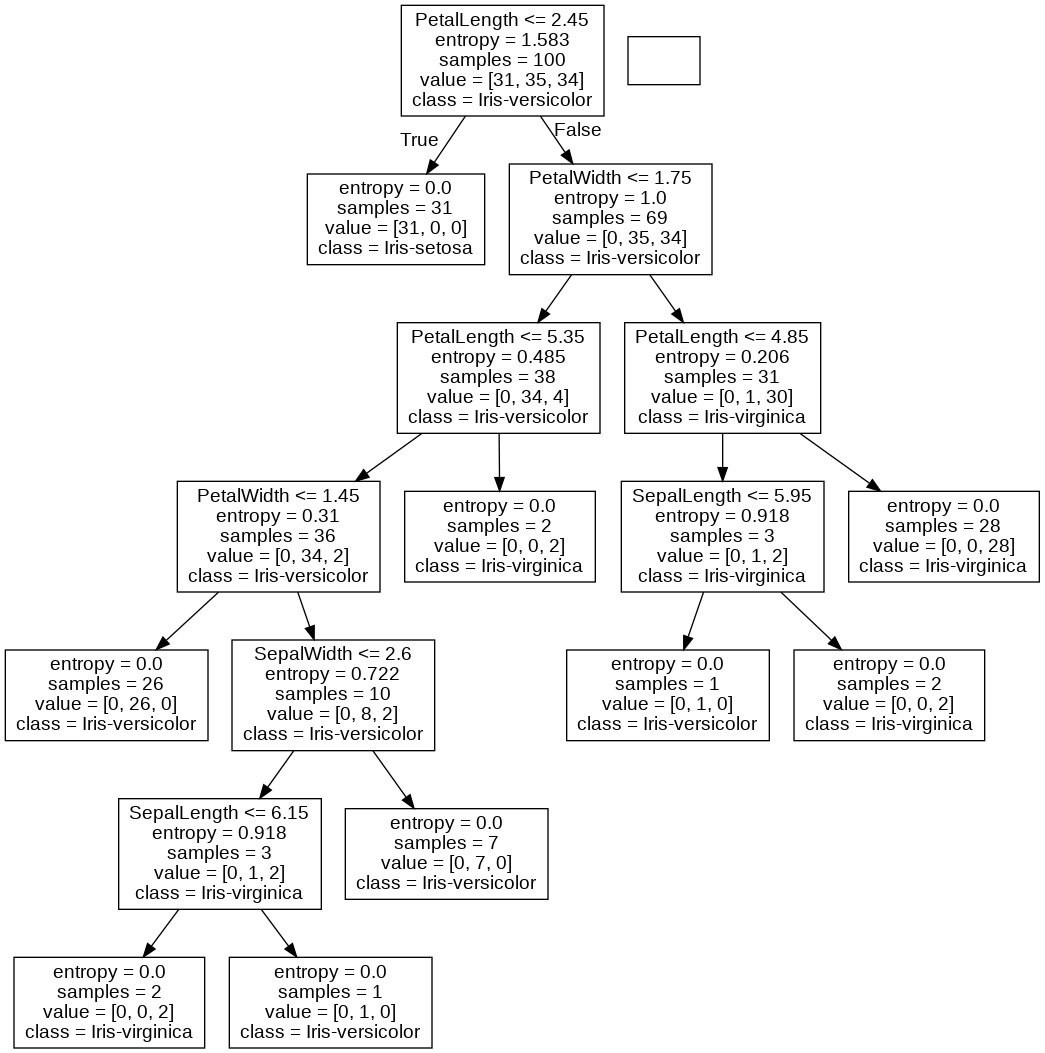

In [ ]:
feature_names=data.columns.values[:4]
target_names=np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, feature_names=feature_names,  class_names=target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())